<a href="https://colab.research.google.com/github/ikfinakmlya/klasifikasi_TBC/blob/main/coba_TBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = "/content/drive/MyDrive/TBC1"


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/TBC1"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,       # 80% train, 20% val
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),      # resize dari 512x512 ke 128x128
    batch_size=16,
    class_mode="binary",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=16,
    class_mode="binary",
    subset="validation"
)

Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Bangun CNN sederhana
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # binary output
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    epochs=5,                 # bisa disesuaikan
    validation_data=val_generator
)

# Simpan model
model.save("cnn_tbc_model.keras")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 237ms/step - accuracy: 0.8770 - loss: 0.3845 - val_accuracy: 0.8619 - val_loss: 0.2652
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 49s 233ms/step - accuracy: 0.9298 - loss: 0.1882 - val_accuracy: 0.8679 - val_loss: 0.2481
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 49s 236ms/step - accuracy: 0.9414 - loss: 0.1524 - val_accuracy: 0.8940 - val_loss: 0.2343
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 49s 234ms/step - accuracy: 0.9370 - loss: 0.1673 - val_accuracy: 0.8833 - val_loss: 0.2206
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 49s 232ms/step - accuracy: 0.9427 - loss: 0.1433 - val_accuracy: 0.8821 - val_loss: 0.2366


53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.8868 - loss: 0.2522
Validation Accuracy: 0.8809523582458496
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step


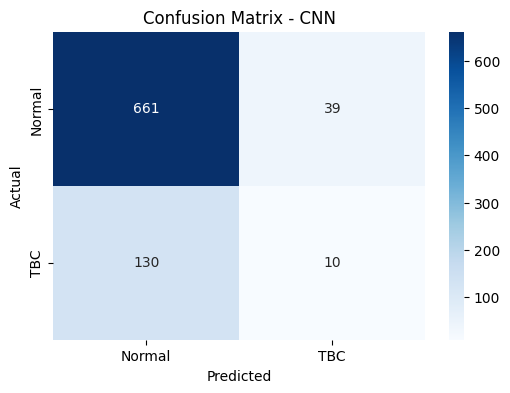

Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.94      0.89       700
         TBC       0.20      0.07      0.11       140

    accuracy                           0.80       840
   macro avg       0.52      0.51      0.50       840
weighted avg       0.73      0.80      0.76       840



In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi model di validation set
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

# Prediksi pada data validasi
y_pred = model.predict(val_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")  # ubah ke 0/1

# Label sebenarnya dari val_generator
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "TBC"],
            yticklabels=["Normal", "TBC"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=["Normal", "TBC"]))


In [12]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 145.6 MB/s eta 0:00:00


In [18]:

import streamlit as st
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load model (.keras)
model = tf.keras.models.load_model("cnn_tbc_model.keras")

st.title("Klasifikasi Citra TBC vs Normal")
st.write("Upload gambar X-ray untuk deteksi TBC menggunakan model CNN.")

uploaded_file = st.file_uploader("Pilih gambar...", type=["jpg","jpeg","png"])

if uploaded_file is not None:
    img = image.load_img(uploaded_file, target_size=(64,64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    label = "TBC" if prediction[0][0] > 0.5 else "Normal"

    st.image(img, caption=f"Hasil Prediksi: {label}", use_column_width=True)
    st.success(f"Prediksi Model: **{label}**")


2025-09-25 16:54:08.450 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 16:54:08.740 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-25 16:54:08.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 16:54:08.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 16:54:08.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 16:54:08.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 16:54:08.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 16:54:08.745 Thread 'MainThread': mi